<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Seminar #1: Inroduction into Time Series Analysis

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h3> Plan </h3>
  * **Remind: Regression**
  * **Autoregression Model**
  * **HW** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sc

%matplotlib inline

<h1 align="center"> Remind: Regression </h1>

In [ ]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression", width=800, height=400)

In [ ]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge", width=800, height=400)

## Underfitting VS Overfitting

In [6]:
np.random.seed(0)

n_samples = 30
degrees = [2, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X) # ещё один способ определить функцию: с помощью lambda-функции

# Data Generation
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

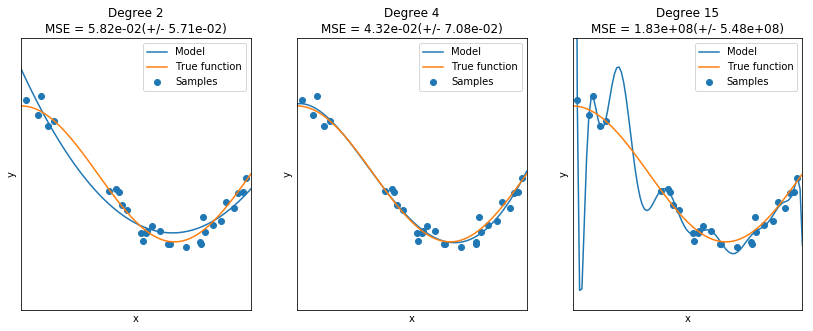

In [7]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = model_selection.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

<h1 align="center"> Autoregression</h1>

## Data: energy consumption

In [7]:
# Caution: different version of pandas needs differnt codes!!!
# ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
ts = pd.read_csv('consumption_train.csv', sep='\t', decimal='.', parse_dates=True, dayfirst=False, index_col='Dates')
ts.head(24)

ERROR:root:Line magic function `%?` not found.


,EnergyCons,Dev,WeekDay
Dates,,,
2005-01-01 00:00:00,1290,-11,6
2005-01-01 01:00:00,1266,-12,6
2005-01-01 02:00:00,1273,-13,6
2005-01-01 03:00:00,1280,-14,6
2005-01-01 04:00:00,1293,-15,6
2005-01-01 05:00:00,1263,-16,6
2005-01-01 06:00:00,1279,-16,6
2005-01-01 07:00:00,1304,-16,6
2005-01-01 08:00:00,1330,-16,6


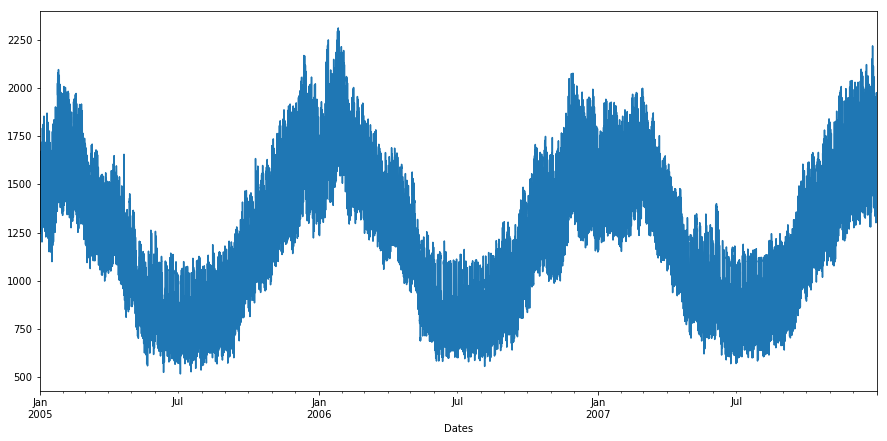

In [10]:
# Plot time series
ts['EnergyCons'].plot(figsize=(15,7))

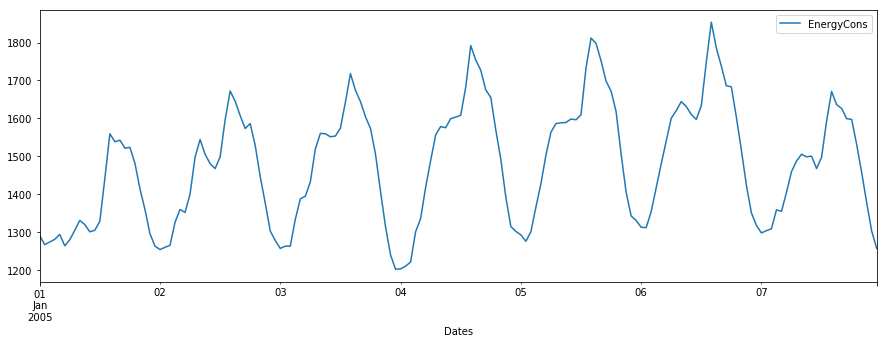

In [13]:
# the first week
ts.ix['2005-01-01 00:00:00':'2005-01-07 23:00:00', range(1)].plot(figsize=(15,5))

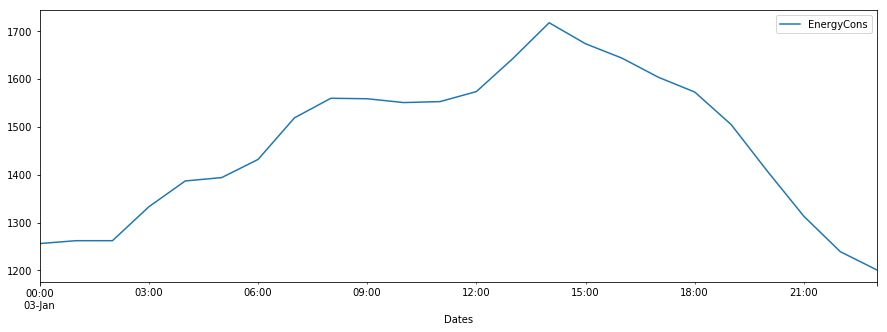

In [14]:
# the first day
ts.ix['2005-01-03 00:00:00':'2005-01-03 23:00:00', range(1)].plot(figsize=(15,5))

## STL-decomposition

In [5]:
import statsmodels.api as sm

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
ts['EnergyCons'].ix['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum().plot(figsize=(15,7))

NameError: name 'ts' is not defined

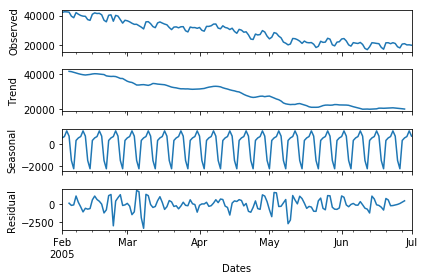

In [21]:
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].ix['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum())
resplot = res.plot()

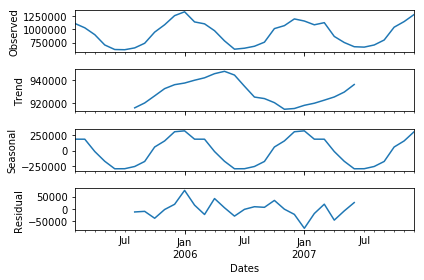

In [22]:
# fig = plt.figure(figsize=(15,10))
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].ix['2005-02-01 00:00':'2008-01-01 23:00'].resample("M").sum())
resplot = res.plot()

## Autoregression: build matrix of autoregression

In [4]:
sc.linalg.hankel([1,2,3,4], [4,7,7,8,9])

array([[1, 2, 3, 4, 7],
       [2, 3, 4, 7, 7],
       [3, 4, 7, 7, 8],
       [4, 7, 7, 8, 9]])

In [109]:
def get_autoregrmatrix_wrong(x,h,K):
    L = len(x)
#     x = np.arange(L)
    X = sc.linalg.hankel(x[:L-h-K+1], x[-K:])
    y = x[K+h-1:]
    return X,y

In [110]:
def get_autoregrmatrix(x,h,n):
    t = len(x)
    X = sc.linalg.hankel(x[:t-h-n+1], x[t-h-n:t-h])
    y = x[n-1+h:]
    return X,y

# Forecast for next hour (h=1) using 1 week history (K=168)

In [141]:
K=200
h = 1 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-03-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

In [142]:
x_train.shape

(8761,)

In [143]:
X_train.shape

(8561, 200)

In [144]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(8561, 200)
(8561,)
(1913, 200)
(1913,)


In [145]:
# Matrix of Samples and Regressors
X_train

array([[1290, 1266, 1273, ..., 1384, 1432, 1478],
       [1266, 1273, 1280, ..., 1432, 1478, 1507],
       [1273, 1280, 1293, ..., 1478, 1507, 1480],
       ..., 
       [1940, 1939, 1887, ..., 1645, 1541, 1394],
       [1939, 1887, 1826, ..., 1541, 1394, 1349],
       [1887, 1826, 1772, ..., 1394, 1349, 1312]])

In [146]:
# Target Vector
y_train

Dates
2005-01-09 08:00:00    1507
2005-01-09 09:00:00    1480
2005-01-09 10:00:00    1503
2005-01-09 11:00:00    1526
2005-01-09 12:00:00    1536
2005-01-09 13:00:00    1591
2005-01-09 14:00:00    1714
2005-01-09 15:00:00    1717
2005-01-09 16:00:00    1668
2005-01-09 17:00:00    1638
2005-01-09 18:00:00    1626
2005-01-09 19:00:00    1542
2005-01-09 20:00:00    1432
2005-01-09 21:00:00    1319
2005-01-09 22:00:00    1284
2005-01-09 23:00:00    1249
2005-01-10 00:00:00    1242
2005-01-10 01:00:00    1237
2005-01-10 02:00:00    1260
2005-01-10 03:00:00    1346
2005-01-10 04:00:00    1460
2005-01-10 05:00:00    1525
2005-01-10 06:00:00    1580
2005-01-10 07:00:00    1636
2005-01-10 08:00:00    1693
2005-01-10 09:00:00    1681
2005-01-10 10:00:00    1681
2005-01-10 11:00:00    1684
2005-01-10 12:00:00    1700
2005-01-10 13:00:00    1779
                       ... 
2005-12-30 19:00:00    1682
2005-12-30 20:00:00    1586
2005-12-30 21:00:00    1484
2005-12-30 22:00:00    1401
2005-12-30 23:

Train score: 0.997, Test score: 0.993


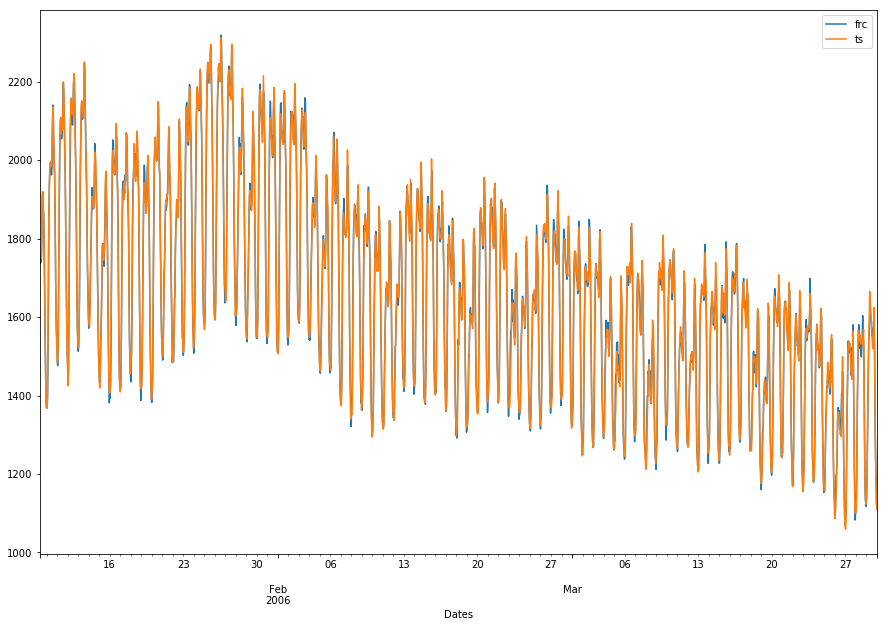

In [147]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,10))

## Try another delay: h=168

Train score: 0.933, Test score: 0.651


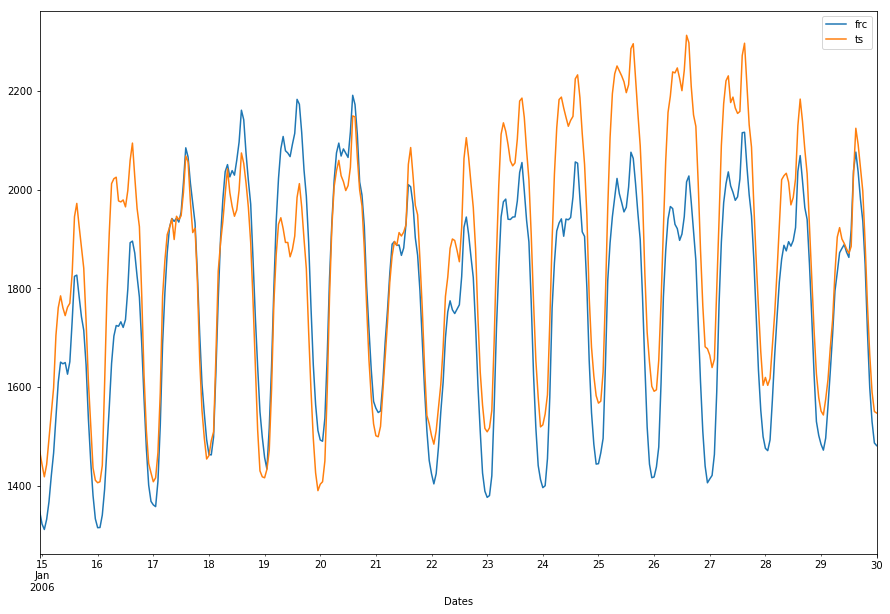

In [148]:
K=168
h = 168 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,10))

<h1 align="center"> Home Work 0</h1>

## Answer to questions 
  ** 1. What is time series? **
         
A sequence of values of some variable, detected in a constant time interval.
     
       
  ** 2. What is delay and horizon of forecast?**
   
It is a time interval, after which is done the forecast. And the horison is the maximum delay for our predictor.
         
  ** 3. What is Least Squared Method for Linear Regression?**
  
Find a predictor $f(x,\hat\omega) = \hat\omega^Tx$ where $ \hat\omega = arg\underset{\omega}{min}(\sum\limits_{i=1}^n (f(x_i,\omega) - y_i)^2) $
          
  ** 4. What is the solution of linear regression via LS method (in terms of matrix $X, \alpha, Y$)? **
 
$ \alpha^\ast = (X^TX)^{-1}X^TY$
  
  ** 5. Write down main problems of LS method. **
  
It isn't adaptive.
          
  ** 6. What hankel transformation of a matrix? **
  
$ A_{i,j} = A_{i+1,j-1} = a_{i+j-2} $
          

## Practical Task
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting. You should write code to show dependence for $h=1,2,\dots, 720$. You can choose amount of regressors fo LR in experiment as much as you want.   

In [139]:
scores = np.zeros((720,2))
n = 200
for h in range(1,721):
    
    X_train, y_train = get_autoregrmatrix(x_train,h,n)
    X_test, y_test = get_autoregrmatrix(x_test,h,n)
    linear_regression = LinearRegression()
    linear_regression.fit(X_train,y_train)
    print('horizon:',h)
    scores[h-1,0],scores[h-1,1] = (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test))


('horizon:', 1)
('horizon:', 2)
('horizon:', 3)
('horizon:', 4)
('horizon:', 5)
('horizon:', 6)
('horizon:', 7)
('horizon:', 8)
('horizon:', 9)
('horizon:', 10)
('horizon:', 11)
('horizon:', 12)
('horizon:', 13)
('horizon:', 14)
('horizon:', 15)
('horizon:', 16)
('horizon:', 17)
('horizon:', 18)
('horizon:', 19)
('horizon:', 20)
('horizon:', 21)
('horizon:', 22)
('horizon:', 23)
('horizon:', 24)
('horizon:', 25)
('horizon:', 26)
('horizon:', 27)
('horizon:', 28)
('horizon:', 29)
('horizon:', 30)
('horizon:', 31)
('horizon:', 32)
('horizon:', 33)
('horizon:', 34)
('horizon:', 35)
('horizon:', 36)
('horizon:', 37)
('horizon:', 38)
('horizon:', 39)
('horizon:', 40)
('horizon:', 41)
('horizon:', 42)
('horizon:', 43)
('horizon:', 44)
('horizon:', 45)
('horizon:', 46)
('horizon:', 47)
('horizon:', 48)
('horizon:', 49)
('horizon:', 50)
('horizon:', 51)
('horizon:', 52)
('horizon:', 53)
('horizon:', 54)
('horizon:', 55)
('horizon:', 56)
('horizon:', 57)
('horizon:', 58)
('horizon:', 59)
('hori

('horizon:', 464)
('horizon:', 465)
('horizon:', 466)
('horizon:', 467)
('horizon:', 468)
('horizon:', 469)
('horizon:', 470)
('horizon:', 471)
('horizon:', 472)
('horizon:', 473)
('horizon:', 474)
('horizon:', 475)
('horizon:', 476)
('horizon:', 477)
('horizon:', 478)
('horizon:', 479)
('horizon:', 480)
('horizon:', 481)
('horizon:', 482)
('horizon:', 483)
('horizon:', 484)
('horizon:', 485)
('horizon:', 486)
('horizon:', 487)
('horizon:', 488)
('horizon:', 489)
('horizon:', 490)
('horizon:', 491)
('horizon:', 492)
('horizon:', 493)
('horizon:', 494)
('horizon:', 495)
('horizon:', 496)
('horizon:', 497)
('horizon:', 498)
('horizon:', 499)
('horizon:', 500)
('horizon:', 501)
('horizon:', 502)
('horizon:', 503)
('horizon:', 504)
('horizon:', 505)
('horizon:', 506)
('horizon:', 507)
('horizon:', 508)
('horizon:', 509)
('horizon:', 510)
('horizon:', 511)
('horizon:', 512)
('horizon:', 513)
('horizon:', 514)
('horizon:', 515)
('horizon:', 516)
('horizon:', 517)
('horizon:', 518)
('horizon:

In [140]:
scores

array([[ 0.99699358,  0.99292534],
       [ 0.99313625,  0.98289465],
       [ 0.98994344,  0.97389505],
       ..., 
       [ 0.71224617,  0.1717837 ],
       [ 0.71198377,  0.1707398 ],
       [ 0.71144631,  0.17064152]])

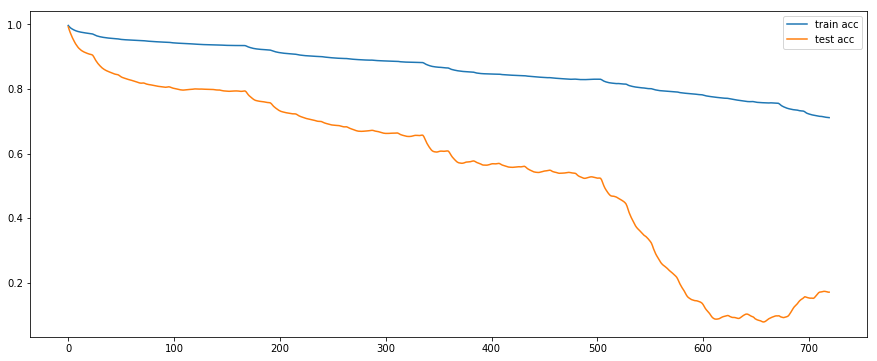

In [158]:
plt.figure(figsize=(15,6))
plt.plot(scores[:,0],label='train acc')
plt.plot(scores[:,1], label='test acc')
plt.legend()
plt.show()